# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

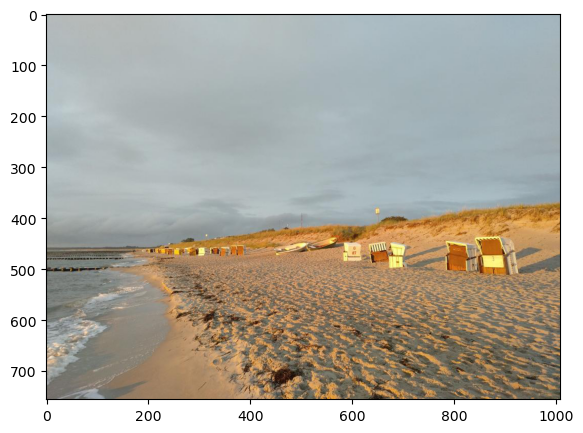

In [60]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x2b3f614a0d0>)

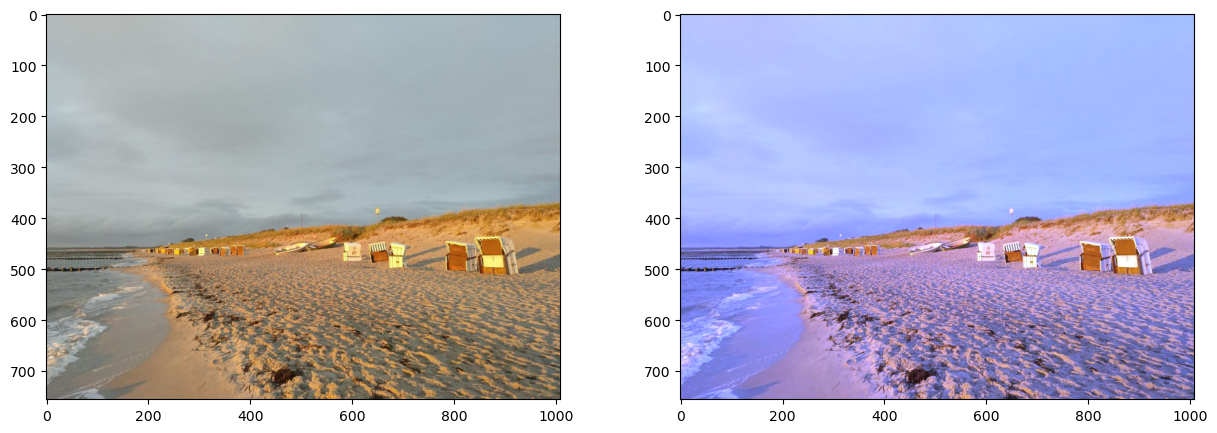

In [61]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x2b3f7292410>)

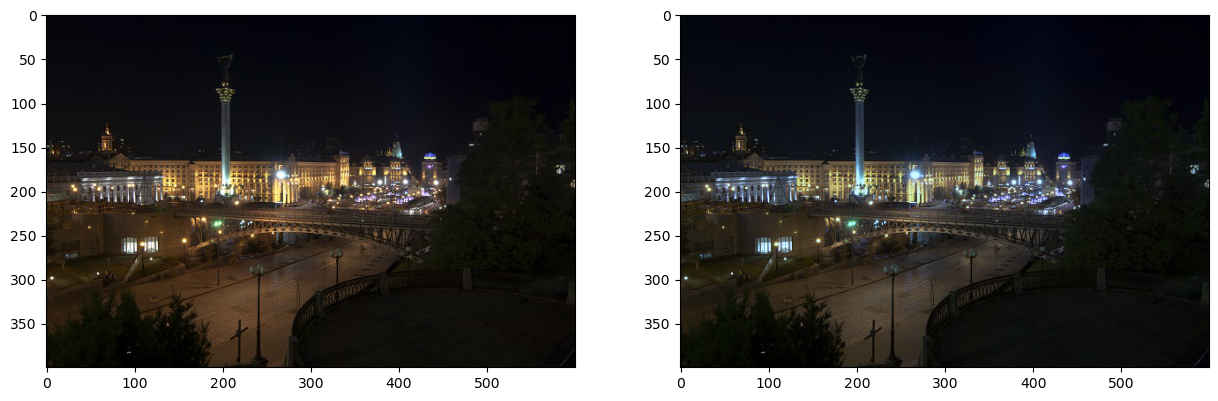

In [66]:
# Load your image
img = cv2.imread('data/DSC_5689.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
red, green, blue = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(red)
mean_g = np.mean(green)
mean_b = np.mean(blue)
mean_max = np.max([mean_r, mean_g, mean_b])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_max / mean_r
kg = mean_max / mean_g
kb = mean_max / mean_b

# Normalizing coefficients to avoid brightness change
# Assuming sum of coefficients should be 3 (amount of channels)
kn = 3 / (kr + kg + kb)
kr = kr * kn
kg = kg * kn
kb = kb * kn

# Apply color balancing and generate the balanced image
red = np.round(np.clip(red * kr, 0, 255)).astype(int)
green = np.round(np.clip(green * kg, 0, 255)).astype(int)
blue = np.round(np.clip(blue * kb, 0, 255)).astype(int)
balanced = cv2.merge([red, green, blue])

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x2b3fb875d10>)

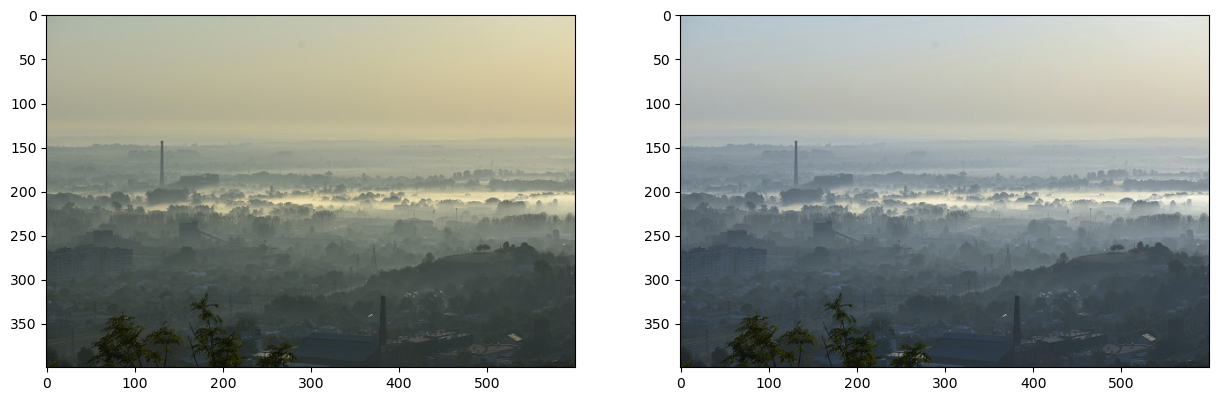

In [71]:
# Load your image
img = cv2.imread('data/DSC_4146.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
red, green, blue = cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(red)
max_g = np.max(green)
max_b = np.max(blue)

# Apply scale-by-max balancing and generate the balanced image
kr = 255 / max_r
kg = 255 / max_g
kb = 255 / max_b
red = np.round(red * kr).astype(int)
green = np.round(green * kg).astype(int)
blue = np.round(blue * kb).astype(int)
balanced = cv2.merge([red, green, blue])

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)